# **Predicting a Book’s rating or recommending new books.**


*  Data Collection and Preparation:
*  Feature Selection and Engineering
*   Label Preparation:
Define the target variable, which in this case is the book's rating.
*   List item






In [ ]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


**Read the data**

In [ ]:
# Use the following line to browse and select the CSV file
uploaded = files.upload()

# Get the file name of the uploaded CSV
file_name = list(uploaded.keys())[0]

# Read the CSV file using pandas
try:
  # df = pd.read_csv('Test.csv', header=None, sep='\n')
# df = df[0].str.split(',', expand=True)
    data = pd.read_csv(file_name,delimiter=',', error_bad_lines=False)
    #data = data[0].str.split(',', expand=True)
except FileNotFoundError:
    print("File not found. Please make sure you selected the correct file.")
    exit()

# Display the content of the CSV file
#Display the first 5 rows
data.head()



Saving books.csv to books (5).csv


<ipython-input-54-09d0e3108974>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(file_name,delimiter=',', error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic




---


**Clean the data:**

Handle missing values, duplicates, and outliers.

In [ ]:
# Check for missing values
print(data.isnull().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


In [ ]:
# Check for duplicates
print(data.duplicated().sum())

0


In [ ]:

# display unique values
language_code = data['language_code'].unique()

language_code


array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

for the ENGLISH language we have multiple accent . Encoding can lead to a large number of columns if we have many unique categories. This can increase the dimensionality of our data and potentially impact the performance of our machine learning models For

that's why we have combined the english accents in one values 'eng'

In [ ]:
data['language_code'] = data['language_code'].replace(["en-US","en-CA","en-GB"],"eng")

data['language_code'].unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'ger', 'jpn', 'ara',
       'nl', 'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg',
       'wel', 'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)



---


Let's Encode categorical variables like language, authors and publisher using techniques of Target Encoding, Frequency or Count Encoding and One-hot encoding


the choice of encoding technique depends on your specific data and problem


In [ ]:
# create 'df' and 'df2' variables to keep 'data' variable raw
df = data.copy()
df2 = data.copy()

# Perform Frequency Encoding

In [ ]:
# Perform Frequency Encoding


freq_encoding_map = df2['language_code'].value_counts().to_dict()
df2['language_encoded'] = df2['language_code'].map(freq_encoding_map)

freq_encoding_map = df2['publisher'].value_counts().to_dict()
df2['publisher_encoded'] = df2['publisher'].map(freq_encoding_map)

freq_encoding_map = df2['authors'].value_counts().to_dict()
df2['authors_encoded'] = df2['authors'].map(freq_encoding_map)

#df2.head()

# Perform Target Encoding

In [ ]:
# Perform Target Encoding

encoding_map = df.groupby('language_code')['average_rating'].mean().to_dict()
df['language_encoded'] = df['language_code'].map(encoding_map)

encoding_map = df.groupby('publisher')['average_rating'].mean().to_dict()
df['publisher_encoded'] = df['publisher'].map(encoding_map)

encoding_map = df.groupby('authors')['average_rating'].mean().to_dict()
df['authors_encoded'] = df['authors'].map(encoding_map)


#df.head()

# let's check the correlation between the data columns before and after Encoder



In the case of our study, we have various features like "authors", "publisher" ,"average rating," "number of pages," "rating count," "text review count," etc. <br>

 Checking correlations between variables in our case of study is important because it helps us to understand how different attributes of the Book rating are related to each other.<br>

  This understanding can guide our feature selection, model building, and analysis process. Correlation analysis can reveal patterns, dependencies, and potential multicollinearity issues that might affect the accuracy and interpretability of our final model.



Note 🐾 a correlation plot or heatmap, darker colors usually indicate higher correlation values. The correlation values range between -1 and 1



<ipython-input-59-2f731eef17de>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm", ax=ax1)
<ipython-input-59-2f731eef17de>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax2)


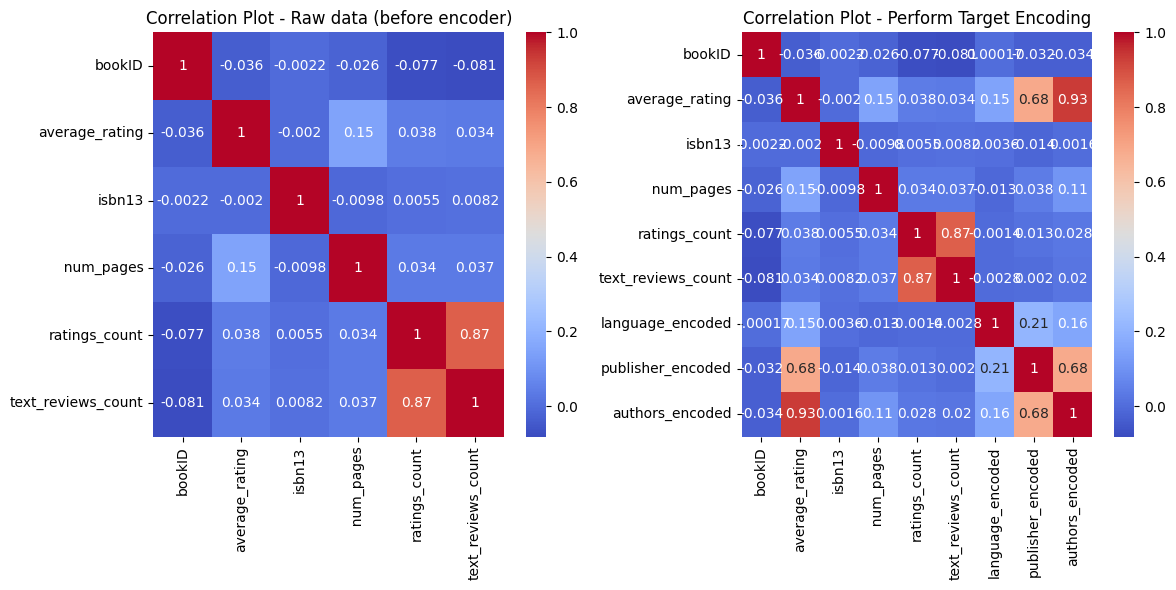

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))



# Plot correlation heatmaps

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", ax=ax1)
ax1.set_title("Correlation Plot - Raw data (before encoder)")

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax2)
ax2.set_title("Correlation Plot - Perform Target Encoding")

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()








<ipython-input-60-f591463132a3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", center=0, ax=ax)


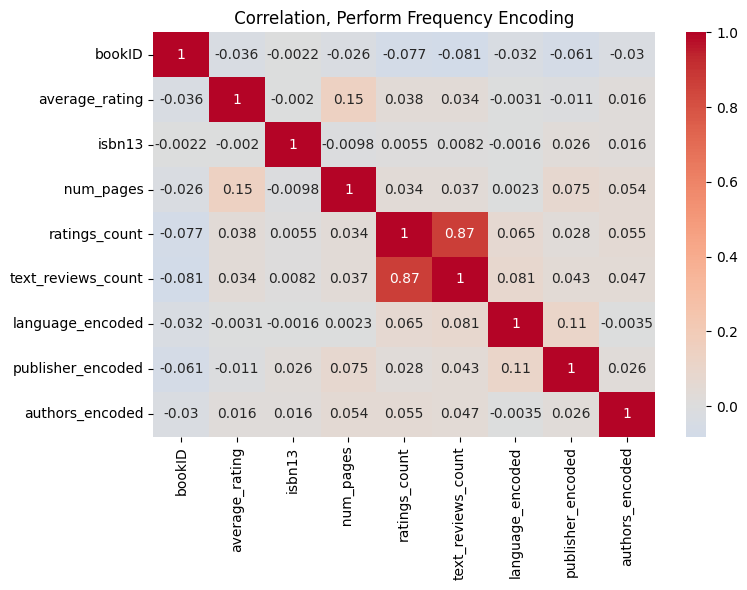

In [ ]:
# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))


sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", center=0, ax=ax)
ax.set_title(" Correlation, Perform Frequency Encoding ")

# Display the plot
plt.tight_layout()
plt.show()

Now We have experimented with 3 different encoders to assess their impact on the data and how they can influence the results. Initially, we utilized :<br><br>

**One-hot encoding** *(a technique employed to transform categorical variables into a binary format, where distinct categories are represented by individual binary columns).* However, this approach led to a substantial increase in the number of resulting columns. When dealing with numerous unique categories across multiple columns, this elevation in dimensionality could potentially affect the performance of our machine learning models, si it wasen't good for in case

**Frequency or Count Encoding:**
*(Frequency encoding replaces categories with their frequency or count in the dataset)*. However we had Similar Patterns. so the original categorical variables had similar patterns and distributions, frequency encoding did not introduce new patterns and relationships that affect the correlation (see the correlation plot)


**Target encoding** : (replaces categorical values with the average target value for each category. This can work well when the category's average target value is informative). for our case Target encoding is very effective since there's a correlation between our categorical features and the target variable 'rating_average'. By incorporating information from the target variable into the encoding process, target encoding can help capture underlying patterns and relationships in the data that might be relevant for your predictive model.





> Based on the correlation plot, it is evident that the **target encoding** emerged as the most optimal encoding technique for our specific case



In [ ]:
to do

In [ ]:
from pandas.io.formats.info import DataFrameTableBuilder
import matplotlib.pyplot as plt

col = ['  num_pages', 'ratings_count', 'text_reviews_count','language_encoded','publisher_encoded', 'authors_encoded']
X = df[col].copy
y = df['average_rating'].copy



import matplotlib.pyplot as plt
plt.scatter(X[:,1], X[:,2], c=y)
plt.show()

TypeError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['  num_pages', 'ratings_count', 'text_reviews_count','language_encoded','publisher_encoded', 'authors_encoded']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['average_rating']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

<Axes: xlabel='average_rating', ylabel='Count'>

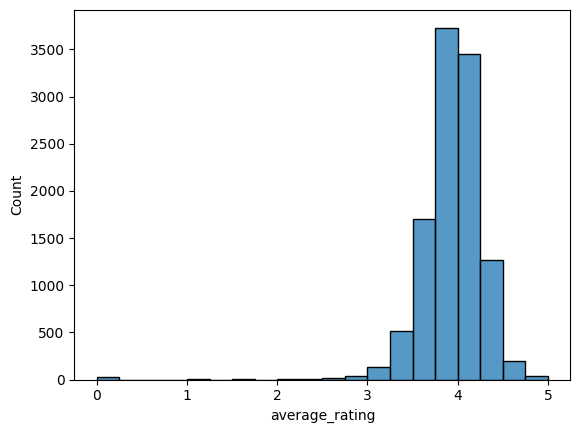

In [ ]:
# checking for bias
sns.histplot(data=df, x="average_rating", binwidth=0.25)

We have much more data about books with a rating between 3.50 and 4.50. Our model will be better at predicting ratings in this range, and bad at predicting other ratings.



In [ ]:
# we will have to either create more data for the low/very high ratings
# or we can create categories of ratings based on the frequency of the data

# trying equal-frequency binning
categories = pd.qcut(df["average_rating"], 5)
print(categories)

0           (4.18, 5.0]
1           (4.18, 5.0]
2           (4.18, 5.0]
3           (4.18, 5.0]
4           (4.18, 5.0]
              ...      
11118      (4.02, 4.18]
11119      (4.02, 4.18]
11120      (3.89, 4.02]
11121    (-0.001, 3.72]
11122      (3.89, 4.02]
Name: average_rating, Length: 11123, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 3.72] < (3.72, 3.89] < (3.89, 4.02] <
                                           (4.02, 4.18] < (4.18, 5.0]]


In [ ]:
# Check for missing values
print(data.isnull().sum())

# For simplicity, we'll drop rows with missing values
data = data.dropna()

# Check for duplicate bookID
print(data['bookID'].duplicated().sum())

# If there are duplicates, we'll drop them
data = data.drop_duplicates(subset='bookID')

# Fix the column name for num_pages
data = data.rename(columns={'  num_pages': 'num_pages'})

# Convert num_pages to integer
data['num_pages'] = data['num_pages'].astype(int)

# Convert average_rating to float
data['average_rating'] = data['average_rating'].astype(float)

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64
0


In [ ]:
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str)
        return True
    except:
        return False

# Filter out invalid dates
valid_dates_mask = data['publication_date'].apply(is_valid_date)
data = data[valid_dates_mask]

# Convert to datetime
data['publication_date'] = pd.to_datetime(data['publication_date'])

<ipython-input-18-202defe3b0bd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['publication_date'] = pd.to_datetime(data['publication_date'])


In [ ]:
# Extract publication year from publication_date
data['publication_year'] = pd.to_datetime(data['publication_date']).dt.year

# Count the number of authors (assuming they are separated by commas)
data['num_authors'] = data['authors'].apply(lambda x: len(x.split('/')))

# Select the required features
features = ['num_pages', 'ratings_count', 'text_reviews_count', 'publication_year', 'num_authors', 'language_code']
X = data[features]
y = data['average_rating']

# Convert categorical features to numerical
X = pd.get_dummies(X, columns=['language_code'], drop_first=True)

<ipython-input-19-293e57686b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['publication_year'] = pd.to_datetime(data['publication_date']).dt.year
<ipython-input-19-293e57686b11>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['num_authors'] = data['authors'].apply(lambda x: len(x.split('/')))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X and y are already defined

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR()
}

# Function to train and evaluate a model
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

# Evaluate all models and store results
results = []

for name, model in models.items():
    if name == 'Support Vector Regression':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        results.append(evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test))
    else:
        results.append(evaluate_model(name, model, X_train, y_train, X_test, y_test))

# Display results
for res in results:
    print(res)


{'Model': 'Linear Regression', 'MSE': 0.11967170615468475, 'RMSE': 0.3459359856312794, 'MAE': 0.22312817408131552, 'R2': 0.02962247157511011}
{'Model': 'Random Forest', 'MSE': 0.10564886984633583, 'RMSE': 0.32503672076603257, 'MAE': 0.22047164569288388, 'R2': 0.14332892463439706}
{'Model': 'Gradient Boosting', 'MSE': 0.10229766038086313, 'RMSE': 0.31984005437228014, 'MAE': 0.217439557115396, 'R2': 0.17050275262458314}
{'Model': 'Support Vector Regression', 'MSE': 0.11698436305056491, 'RMSE': 0.3420297692461358, 'MAE': 0.21821416878830624, 'R2': 0.05141323100520301}


In [ ]:
# Let's assume we're using the LinearRegression as our chosen model
model = LinearRegression()
model.fit(X_train, y_train)

# Sample book data (you should fill this with your sample book's data)
sample_book = {
    "num_pages": 295,  # Just an example value; bookID 799 with real rating 0.00
    "ratings_count": 0,
    "text_reviews_count": 0,
    "publication_year": 2001,
    "num_authors": 2,
    "language_code": 'eng'
}

# Convert sample book to DataFrame
sample_df = pd.DataFrame([sample_book])

# Convert categorical features to numerical using the same methodology used for the training set
# Note: In practice, you should be using pipelines or similar methods to ensure the exact same transformations
# occur for both training and any new data. This example is simplified.
sample_df = pd.get_dummies(sample_df, columns=['language_code'], drop_first=True)
# Make sure the sample has the same columns as the training set, fill missing columns with zeros
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0

# Predict the rating
predicted_rating = model.predict(sample_df)

print(f"Predicted rating for the sample book is: {predicted_rating[0]}")


Predicted rating for the sample book is: 4.324901953992889
